# NSL-KDD Dataset

Downloaded from https://github.com/jmnwong/NSL-KDD-Dataset/blob/master/KDDTrain%2B.txt

Here are short definitions for the attack types in the NSL-KDD dataset:

- **DoS (Denial of Service):** Attacks aimed at making a network service unavailable by overwhelming it with traffic (e.g., Smurf, Neptune).
- **Probe:** Scanning or reconnaissance attacks to gather information about a target system or network (e.g., Nmap, Portsweep).
- **R2L (Remote to Local):** Attacks where the attacker tries to gain unauthorized access to a system remotely (e.g., Guess_passwd, Ftp_write).
- **U2R (User to Root):** Attacks where the attacker tries to escalate privileges on a system (e.g., Buffer_overflow, Loadmodule).
- **Normal:** Legitimate network activity with no malicious behavior.

These categories represent the types of attacks in the dataset used for intrusion detection research.

## NSL-KDD Dataset Attack Types and Subtypes

### 1. **DoS (Denial of Service)**:
DoS attacks aim to make a network service or system unavailable by overwhelming it with traffic or resource consumption. The goal is to disrupt normal operations or render services inaccessible.

- **Smurf**: An attack where the attacker sends a large number of ICMP Echo requests (ping requests) with the target's address as the source, causing a flood of responses and overwhelming the target.
- **Neptune**: A TCP SYN flood attack, where an attacker sends a large number of SYN requests to a target's system, but doesn't complete the handshake, causing the system to be overwhelmed with half-open connections.
- **Back**: Similar to Neptune but specifically targeting the backend services, flooding them with SYN packets.
- **Land**: The attacker sends a spoofed packet where the source and destination IP addresses are the same, causing the target system to get stuck in a loop trying to process it.
- **Pod**: An attack where the attacker sends malicious packets that confuse the victim's operating system by exploiting certain bugs in network protocol handling.
- **Teardrop**: A form of DoS attack where fragmented packets are sent with overlapping, corrupted data that the target system can't process, often causing a crash.
- **Satan**: A network scanner that discovers vulnerabilities in a target system, though its primary purpose isn't necessarily disruption, it can lead to DoS if exploited.

### 2. **Probe**:
Probe attacks are used for gathering information about a target system or network. They are typically the first step in more sophisticated attacks and aim to identify weaknesses in systems.

- **Nmap**: A network exploration tool used for discovering hosts and services on a computer network. It is commonly used in reconnaissance stages of attacks.
- **Portsweep**: An attack where the attacker sweeps through a range of ports on one or more target systems to find open ports.
- **Ipsweep**: Similar to Portsweep, but in this case, the attacker scans an entire network for live hosts.
- **Mscan**: A scanning tool that identifies which systems are reachable and their vulnerabilities.
- **Saint**: Another reconnaissance tool used for scanning networks for potential vulnerabilities, sometimes leading to exploitation.

### 3. **R2L (Remote to Local)**:
R2L attacks involve attackers attempting to gain unauthorized access to a target system from a remote location. These attacks usually involve exploiting weak authentication or vulnerabilities to infiltrate a system.

- **Guess_passwd**: The attacker tries to guess the password of a remote system by attempting various combinations (password guessing attack).
- **Ftp_write**: An attack where the attacker gains access to a target system’s FTP server with the goal of writing files, often to gain more control over the system.
- **Imap**: Exploiting vulnerabilities in the IMAP (Internet Message Access Protocol) service to gain unauthorized access to email accounts.
- **Phf**: A vulnerability in the **HTTP** service where attackers exploit misconfigured CGI scripts to run arbitrary commands on the server.
- **Warezclient**: A client-side attack where the attacker attempts to retrieve illegal copies of software (warez) via FTP.
- **Warezmaster**: The attacker attempts to upload and share illegal copies of software, often through FTP or other file-sharing methods.

### 4. **U2R (User to Root)**:
U2R attacks involve attackers trying to escalate their privileges from a regular user to a superuser or root. These attacks often target vulnerabilities in operating systems or applications to gain elevated privileges.

- **Buffer_overflow**: The attacker exploits a vulnerability in a program that allows them to overflow a buffer, leading to the execution of arbitrary code, often allowing for privilege escalation.
- **Loadmodule**: An attack where the attacker tries to load malicious code into the kernel, often to gain elevated privileges.
- **Xterm**: Exploiting the X Window system (used in Unix-based systems) to gain unauthorized access and escalate privileges.
- **Fuzzer**: A type of attack where the attacker sends malformed or unexpected input to an application to trigger vulnerabilities, often leading to privilege escalation.

### 5. **Normal**:
These are the instances where network traffic is legitimate, with no signs of malicious intent. They represent **normal behavior** in the dataset and are used as a benchmark for comparing the behavior of attacks.


In [147]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Download the dataset from https://github.com/jmnwong/NSL-KDD-Dataset/blob/master/KDDTrain%2B.txt
# Load the NSL-KDD dataset
# Replace 'KDDTrain+.txt' and 'KDDTest+.txt' with the correct paths to your dataset

train_data = pd.read_csv("./data/nsl-kdd-dataset/KDDTrain+.txt", header=None, names=columns, index_col=False)
test_data = pd.read_csv("./data/nsl-kdd-dataset/KDDTest+.txt", header=None, names=columns, index_col=False)

# Combine train and test data for preprocessing
full_data = pd.concat([train_data, test_data])

# rename label to attack_type
full_data.rename(columns={'label': 'attack_type'}, inplace=True)
full_data[20:].head()

/var/folders/hr/m5cwtmkx5s91gb3q4lx7vnr80000gn/T/ipykernel_43299/3695168105.py:15: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  train_data = pd.read_csv("./data/nsl-kdd-dataset/KDDTrain+.txt", header=None, names=columns, index_col=False)
/var/folders/hr/m5cwtmkx5s91gb3q4lx7vnr80000gn/T/ipykernel_43299/3695168105.py:16: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  test_data = pd.read_csv("./data/nsl-kdd-dataset/KDDTest+.txt", header=None, names=columns, index_col=False)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
20,0,tcp,mtp,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.0,0.0,0.0,neptune
21,0,tcp,private,S0,0,0,0,0,0,0,...,17,0.07,0.06,0.00,0.00,0.99,1.0,0.0,0.0,neptune
22,0,tcp,http,SF,253,11905,0,0,0,0,...,255,1.00,0.00,0.01,0.02,0.00,0.0,0.0,0.0,normal
23,5607,udp,other,SF,147,105,0,0,0,0,...,1,0.00,0.85,1.00,0.00,0.00,0.0,0.0,0.0,normal
24,0,tcp,mtp,S0,0,0,0,0,0,0,...,2,0.01,0.06,0.00,0.00,1.00,1.0,0.0,0.0,neptune


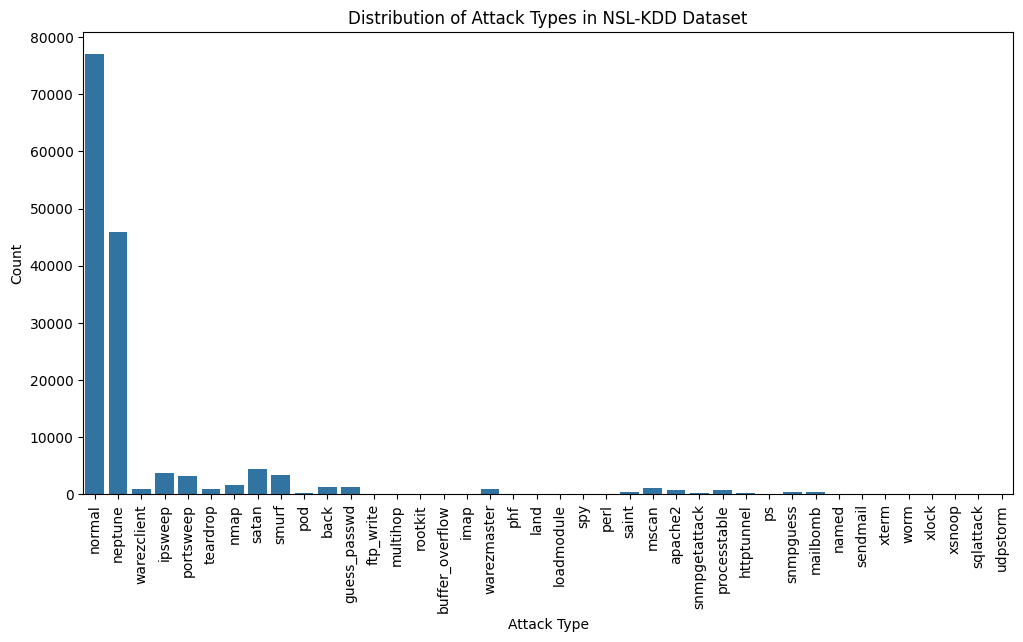

In [63]:
# 1. Histogram of the dataset's labels to check class distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='attack_type', data=full_data)
plt.title('Distribution of Attack Types in NSL-KDD Dataset')
# vertical x labels
plt.xticks(rotation=90)
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.show()

In [64]:
# list numeric columns and non-numeric columns
numeric_columns = full_data.select_dtypes(include=['int64', 'float64']).columns
non_numeric_columns = full_data.select_dtypes(exclude=['int64', 'float64']).columns
print('Numeric columns:\n', numeric_columns.values, '\n')
print('Non-numeric columns:\n', non_numeric_columns.values)

Numeric columns:
 ['duration' 'src_bytes' 'dst_bytes' 'land' 'wrong_fragment' 'urgent' 'hot'
 'num_failed_logins' 'logged_in' 'num_compromised' 'root_shell'
 'su_attempted' 'num_root' 'num_file_creations' 'num_shells'
 'num_access_files' 'num_outbound_cmds' 'is_host_login' 'is_guest_login'
 'count' 'srv_count' 'serror_rate' 'srv_serror_rate' 'rerror_rate'
 'srv_rerror_rate' 'same_srv_rate' 'diff_srv_rate' 'srv_diff_host_rate'
 'dst_host_count' 'dst_host_srv_count' 'dst_host_same_srv_rate'
 'dst_host_diff_srv_rate' 'dst_host_same_src_port_rate'
 'dst_host_srv_diff_host_rate' 'dst_host_serror_rate'
 'dst_host_srv_serror_rate' 'dst_host_rerror_rate'
 'dst_host_srv_rerror_rate'] 

Non-numeric columns:
 ['protocol_type' 'service' 'flag' 'attack_type']


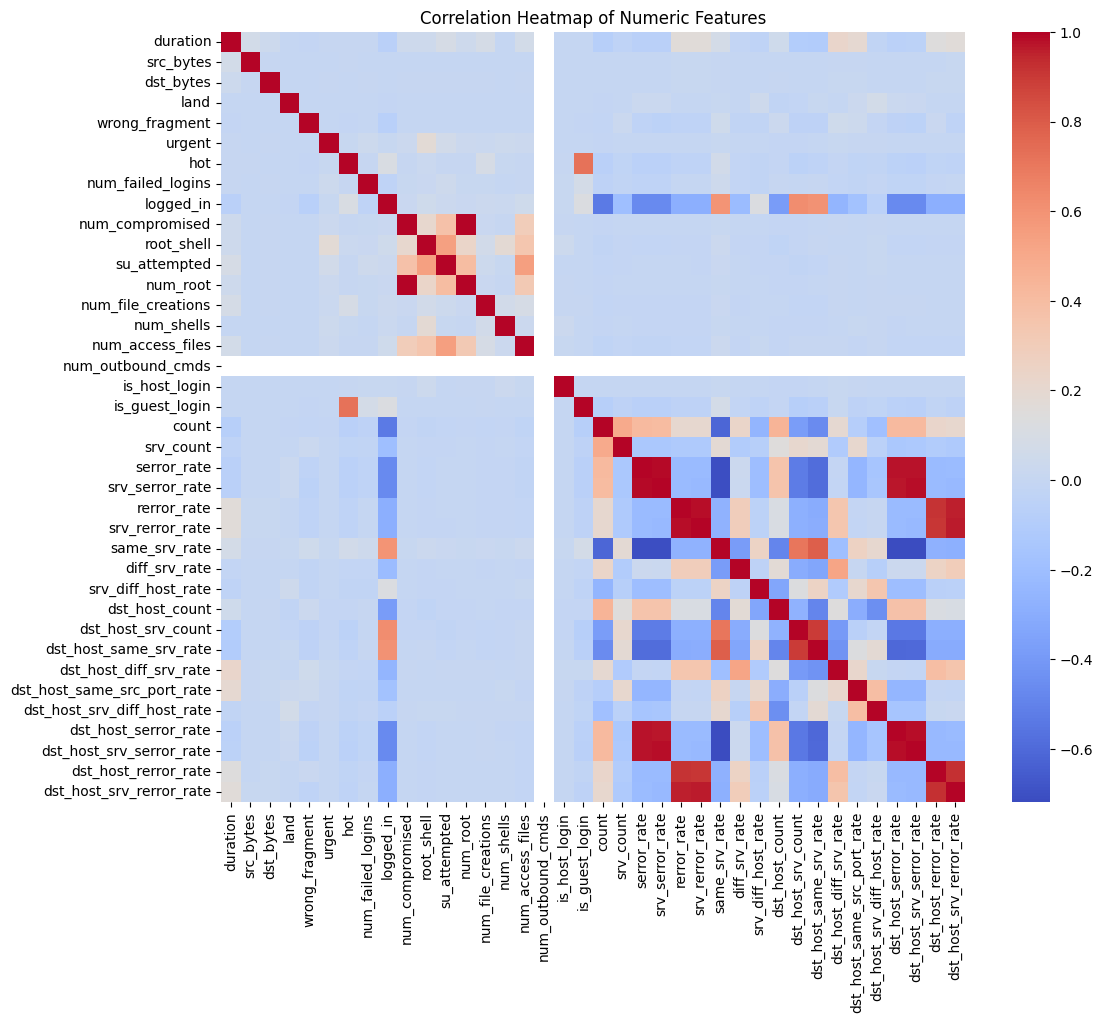

In [65]:
# 2. Correlation Heatmap for numeric features
# Note: You might want to select only numeric columns for this part
numeric_columns = full_data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = full_data[numeric_columns].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

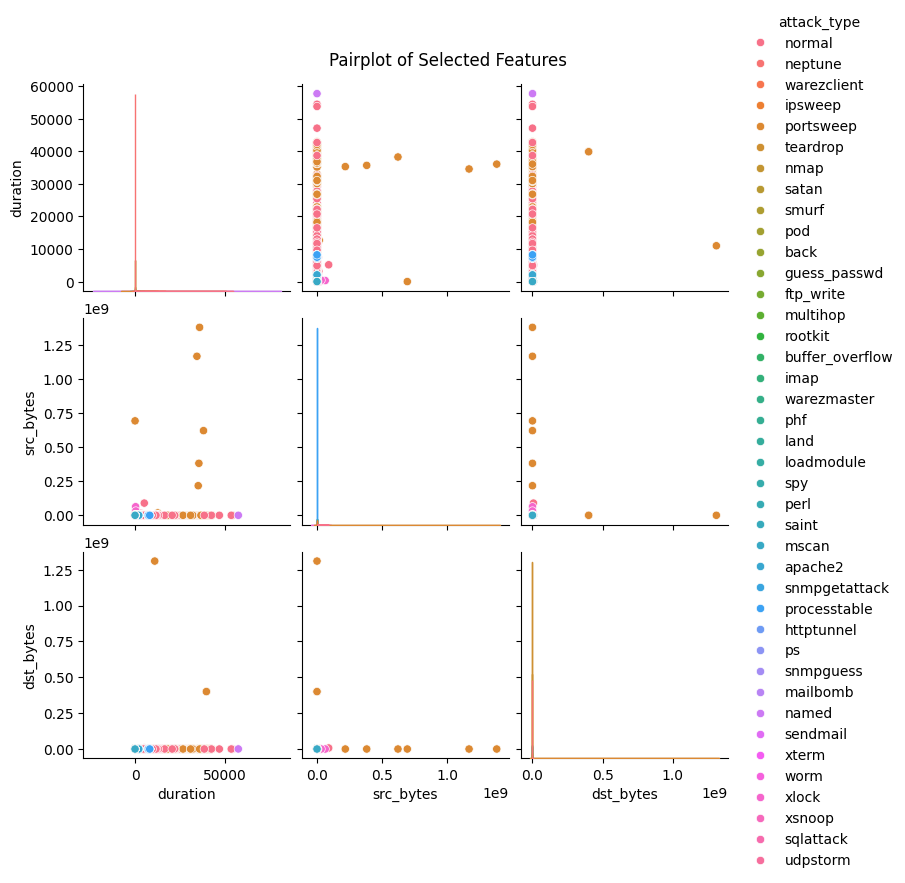

In [66]:
# 3. Pairplot for some selected features (this can be very time-consuming with many features)
# Here, we'll select just a few features for demonstration
selected_features = ['duration', 'src_bytes', 'dst_bytes', 'attack_type']
sns.pairplot(full_data[selected_features], hue='attack_type')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

In [67]:
list(numeric_columns[:10])

['duration',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised']

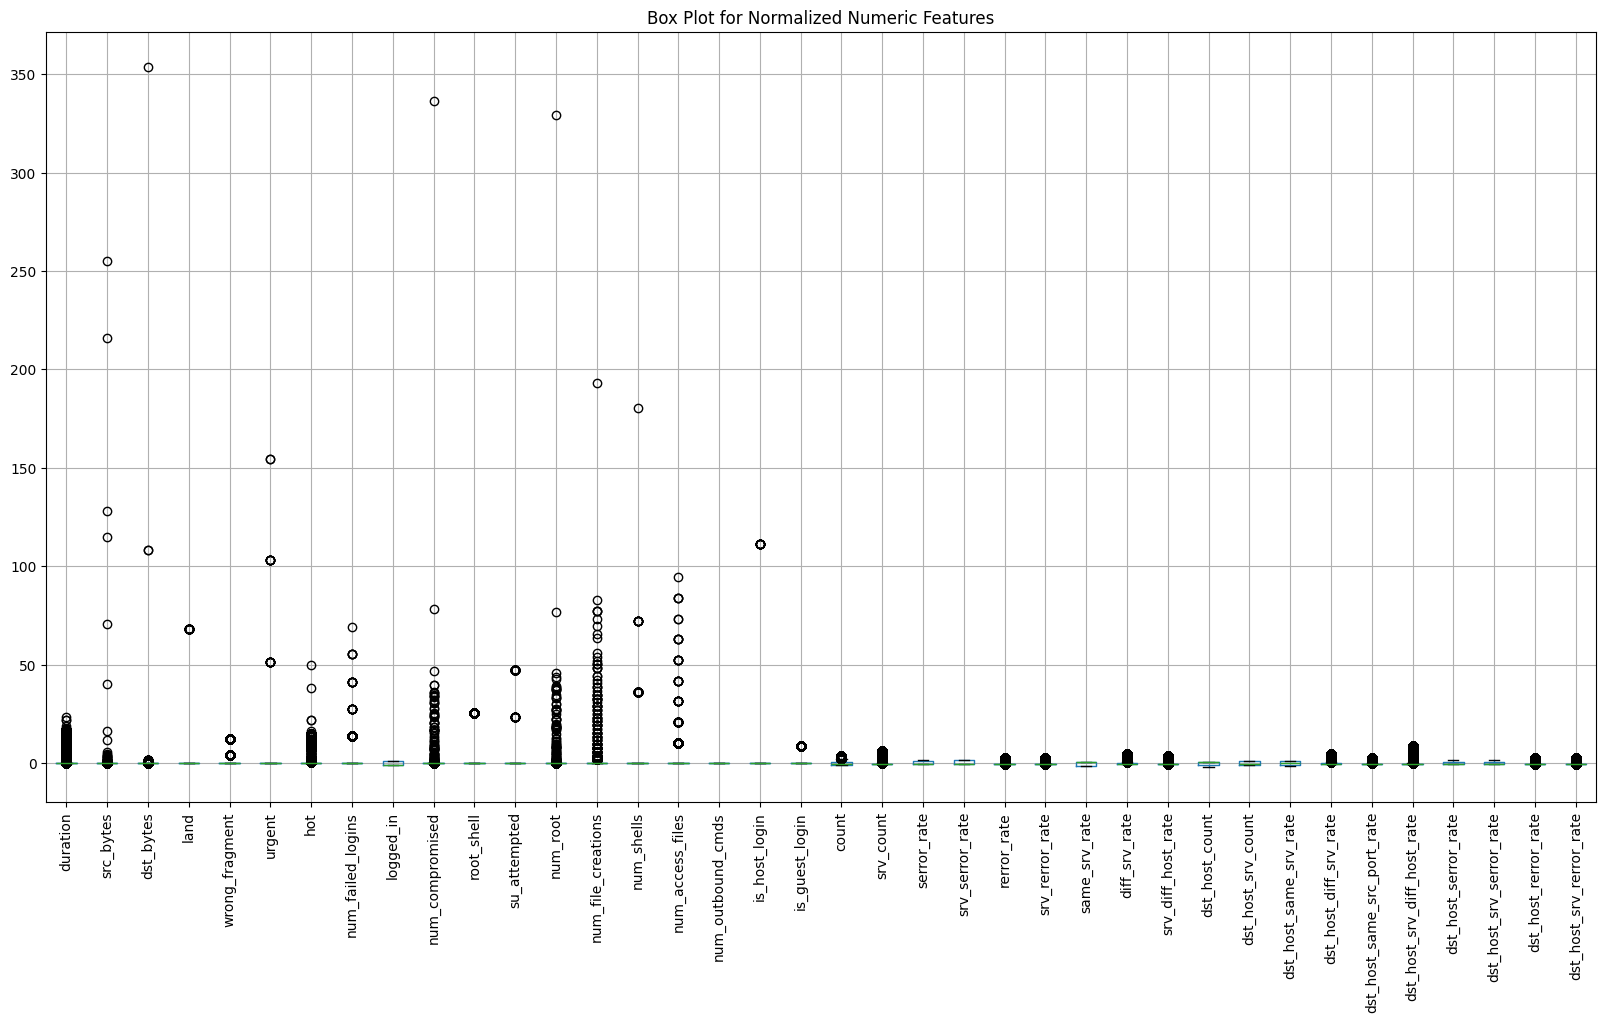

In [68]:
# Separate numeric and categorical columns
numeric_columns = full_data.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = full_data.select_dtypes(exclude=['int64', 'float64']).columns

# Normalize numeric features using StandardScaler
scaler = StandardScaler()
full_data_normalized = full_data.copy()
full_data_normalized[numeric_columns] = scaler.fit_transform(full_data[numeric_columns])

# Verify normalization with updated boxplot
plt.figure(figsize=(20, 10))
full_data_normalized.boxplot(column=list(numeric_columns))
plt.title('Box Plot for Normalized Numeric Features')
plt.xticks(rotation=90)
plt.show()

# ... existing code ...

column src_bytes upper_bound 1594.1999999999825
column dst_bytes upper_bound 7768.5


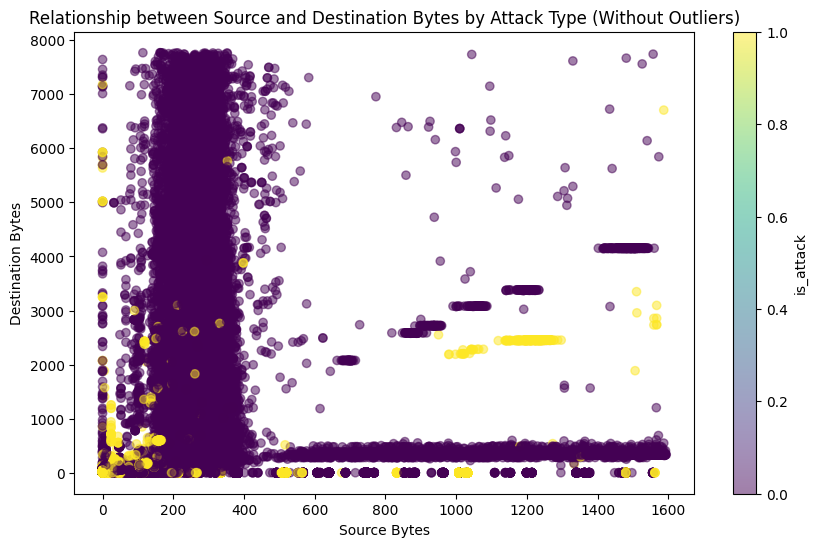

Retained 90.25% of the original data


In [78]:
# Remove outliers using IQR method
def remove_outliers_by_upper_bound(df, columns):
    df_clean = df.copy()
    for col in columns:
        upper_bound = df_clean[col].quantile(0.95)
        df_clean = df_clean[(df_clean[col] <= upper_bound)]
        
        print('column', col, 'upper_bound', upper_bound)
        
    return df_clean

# Remove outliers from src_bytes and dst_bytes
columns_to_clean = ['src_bytes', 'dst_bytes']
clean_data = remove_outliers_by_upper_bound(full_data, columns_to_clean)


# define is_attack column
clean_data['is_attack'] = clean_data['attack_type'].apply(lambda x: 0 if x == "normal" else 1)

# Create scatter plot with cleaned data
plt.figure(figsize=(10, 6))
plt.scatter(clean_data['src_bytes'], clean_data['dst_bytes'], 
           c=clean_data['is_attack'], alpha=0.5)
plt.xlabel('Source Bytes')
plt.ylabel('Destination Bytes')
plt.title('Relationship between Source and Destination Bytes by Attack Type (Without Outliers)')
plt.colorbar(label='is_attack')
plt.show()

# Print the percentage of data retained after removing outliers
print(f"Retained {(len(clean_data)/len(full_data)*100):.2f}% of the original data")

In [146]:
# Encode categorical features
full_data_normalized_encoded = full_data_normalized.copy()
categorical_features = ['protocol_type', 'service', 'flag']
encoder = LabelEncoder()
for feature in categorical_features:
    full_data_normalized_encoded[feature] = encoder.fit_transform(full_data_normalized_encoded[feature])

# Separate features and labels
X = full_data_normalized_encoded.drop(columns=["attack_type"])
y = full_data_normalized_encoded["attack_type"].apply(lambda x: 0 if x == "normal" else 1)  # 0: Normal, 1: Anomaly

# Feature importance using ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

# Get feature scores and p-values
scores = selector.scores_
p_values = selector.pvalues_

# Create a dataframe of features and their importance scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': scores,
    'P-value': p_values
})

# Sort by score in descending order
feature_scores = feature_scores.sort_values('Score', ascending=False)

# Display top 10 features with their scores
print("Top 10 Features Based on ANOVA F-value:")
print(feature_scores.head(10).to_string(index=False))
print()

Top 10 Features Based on ANOVA F-value:
                 Feature         Score  P-value
           same_srv_rate 150040.117982      0.0
      dst_host_srv_count 136906.058832      0.0
  dst_host_same_srv_rate 119428.045778      0.0
               logged_in 117189.407142      0.0
                    flag  97509.763590      0.0
dst_host_srv_serror_rate  80840.445529      0.0
    dst_host_serror_rate  79277.134145      0.0
             serror_rate  78677.146814      0.0
         srv_serror_rate  77928.817187      0.0
                   count  56245.400828      0.0



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [19] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


### Explanations of top 10 Features Based on ANOVA F-value in NSL KDD Dataset

1. **same_srv_rate**  
The rate of connections that are to the same service (protocol + service). This feature indicates how frequently the same service is accessed in the dataset. A high value may suggest that a particular service is being targeted by an attack.

2. **dst_host_srv_count**  
The count of connections to the same service on the destination host. This feature is a measure of how often a specific service is accessed on the destination system. High values can be indicative of scanning or probing behavior.

3. **dst_host_same_srv_rate**  
The rate of connections that are to the same service on the destination host. This feature captures how consistently the same service is being targeted on a particular destination host, which could signal a denial of service or probing activity.

4. **logged_in**  
A binary feature indicating whether a user has logged into the system. A value of 1 means the user has successfully logged in, and 0 means the user has not. This feature is important for identifying unauthorized access attempts or successful logins during an attack.

5. **flag**  
The status flag of the connection (e.g., SF, REJ, RSTO, etc.). It is used to indicate the type of connection, such as whether it was successful or rejected. This feature helps classify traffic behavior and could indicate specific types of attacks, such as resetting connections or denial of service.

6. **dst_host_srv_serror_rate**  
The rate of connections to the same service on the destination host that resulted in a "serror" (server-side error). High values of this feature can indicate a service that is being targeted and possibly overwhelmed by malicious traffic.

7. **dst_host_serror_rate**  
The rate of server-side errors for the destination host. This feature is indicative of how often errors are encountered on the server. A high rate of errors can point to attack scenarios where a service or host is being repeatedly hit with invalid or malicious requests.

8. **serror_rate**  
The rate of connections that result in server-side errors. This feature indicates how often connections fail due to server errors. High values may point to denial of service or brute-force attacks.

9. **srv_serror_rate**  
The rate of server-side errors in connections that target the same service. A high value of this feature can suggest that an attacker is exploiting a vulnerability in a service, or the service is being overwhelmed by malformed requests.

10. **count**  
The number of connections to the same host. This feature is important for detecting patterns of connections over time. High values could indicate a DDoS (Distributed Denial of Service) attack or scanning activity targeting the same host.


/var/folders/hr/m5cwtmkx5s91gb3q4lx7vnr80000gn/T/ipykernel_43299/2845391638.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = full_data.groupby(['attack_type', f'{rate_feature}_binned']).size().unstack(fill_value=0)


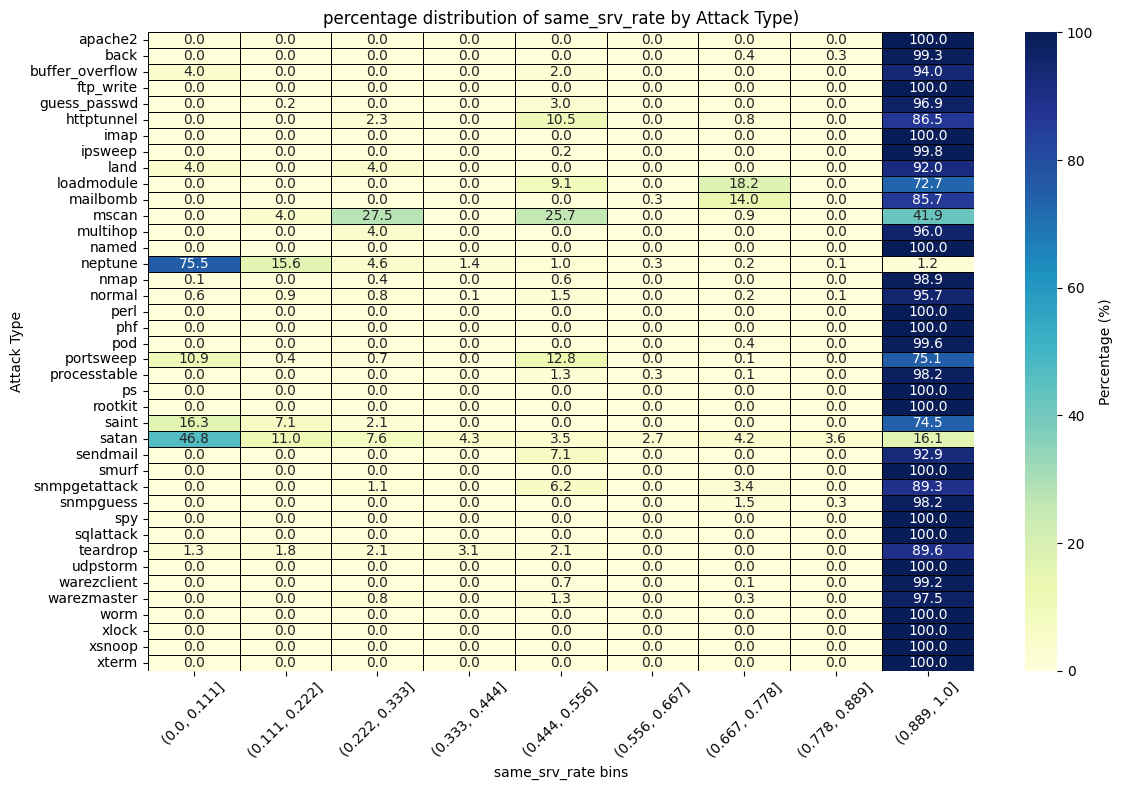

In [166]:

def display_heatmap_for_rate_features_by_attack_type(rate_feature):
    # same_srv_rate by attack_type heatmap, where x axis is attack_type and y axis is same_srv_rate. there should be attack_type many columns, where each column is a heatmap with heat values

    plt.figure(figsize=(12, 8))

    # divide same_srv_rate into 10 bins
    bins = np.linspace(0, 1, 10)

    # create a new column same_srv_rate_binned
    full_data[f'{rate_feature}_binned'] = pd.cut(full_data[rate_feature], bins=bins)

    # group by attack_type and same_srv_rate_binned
    grouped_data = full_data.groupby(['attack_type', f'{rate_feature}_binned']).size().unstack(fill_value=0)

    # Normalize each row (attack type) to show distribution
    normalized_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

    # plot the heatmap
    sns.heatmap(normalized_data, cmap='YlGnBu', 
                annot=True, 
                fmt='.1f',  # Show one decimal place
                cbar_kws={'label': 'Percentage (%)'},
                linewidths=0.5,  # Add cell borders
                linecolor='black')  # Set border color to black
    plt.title(f'percentage distribution of {rate_feature} by Attack Type)')
    plt.xlabel(f'{rate_feature} bins')
    plt.ylabel('Attack Type')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
display_heatmap_for_rate_features_by_attack_type('same_srv_rate')
display_heatmap_for_rate_features_by_attack_type('dst_host_srv_count')

In [165]:
full_data.groupby(['attack_type', 'dst_host_srv_count']).size()

attack_type  dst_host_srv_count
apache2      226                   1
             227                   8
             228                   2
             229                   2
             230                   6
                                  ..
xterm        4                     1
             5                     1
             6                     1
             90                    1
             96                    1
Length: 3387, dtype: int64

In [144]:
# total number of features
print('total number of features:', len(X.columns))

total number of features: 41


In [139]:
dir(selector)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_params',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_support_mask',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_transform',
 '_validate_data',
 '_validate_params',
 'feature_names_in_',
 'fit',
 'fit_transform',
 'get_feature_names_out',
 'get_metadata_routing',
 'get_params',
 'ge

In [140]:
selector.scores_

array([4.04518723e+02, 1.18307673e+04, 1.46787638e+04, 9.75097636e+04,
       4.42333471e+00, 1.90685508e+00, 1.15451752e+01, 9.97885216e+02,
       2.21521731e+00, 1.37930044e+01, 2.71660436e+02, 1.17189407e+05,
       1.45583026e+01, 2.69435520e+01, 6.89722996e+01, 1.85144245e+01,
       4.59382275e+01, 9.94164452e-03, 1.87173710e+02,            nan,
       9.11734284e+00, 2.18856599e+00, 5.62454008e+04, 3.34484734e+01,
       7.86771468e+04, 7.79288172e+04, 1.47598506e+04, 1.45947749e+04,
       1.50040118e+05, 7.25424701e+03, 1.92720739e+03, 2.40708061e+04,
       1.36906059e+05, 1.19428046e+05, 9.45496248e+03, 9.92296872e+02,
       4.19605490e+02, 7.92771341e+04, 8.08404455e+04, 1.47692215e+04,
       1.44716362e+04])

In [90]:
# Anomaly detection using Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
iso_forest.fit(X)
anomaly_scores = iso_forest.decision_function(X)
y_pred = iso_forest.predict(X)
y_pred = [0 if x == 1 else 1 for x in y_pred]  # Flip prediction to match anomaly=1

# Evaluation
print("Classification Report:")
print(classification_report(y, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

# ROC AUC Score
roc_auc = roc_auc_score(y, anomaly_scores)
print(f"ROC AUC Score: {roc_auc}")

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.94      0.69     77054
           1       0.71      0.15      0.24     71463

    accuracy                           0.56    148517
   macro avg       0.63      0.55      0.47    148517
weighted avg       0.62      0.56      0.48    148517

Confusion Matrix:
[[72746  4308]
 [60921 10542]]
ROC AUC Score: 0.22535613147879285


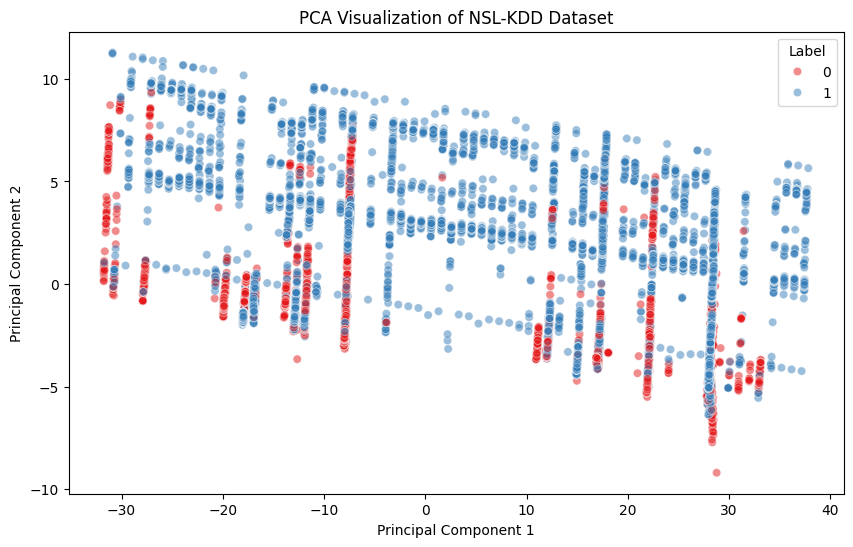

In [92]:
# PCA for Visualization (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set1", alpha=0.5)
plt.title("PCA Visualization of NSL-KDD Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Label", loc="best")
plt.show()

## Feature investigation

In [95]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148517 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     148517 non-null  int64  
 1   protocol_type                148517 non-null  object 
 2   service                      148517 non-null  object 
 3   flag                         148517 non-null  object 
 4   src_bytes                    148517 non-null  int64  
 5   dst_bytes                    148517 non-null  int64  
 6   land                         148517 non-null  int64  
 7   wrong_fragment               148517 non-null  int64  
 8   urgent                       148517 non-null  int64  
 9   hot                          148517 non-null  int64  
 10  num_failed_logins            148517 non-null  int64  
 11  logged_in                    148517 non-null  int64  
 12  num_compromised              148517 non-null  int64  
 13  root_

In [122]:
full_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,148517.000000,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,...,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
mean,276.779305,4.022795e+04,1.708885e+04,0.000215,0.020523,0.000202,0.189379,0.004323,0.402789,0.255062,...,183.928042,119.462661,0.534521,0.084103,0.145932,0.030584,0.256122,0.251304,0.136220,0.136397
std,2460.683131,5.409612e+06,3.703525e+06,0.014677,0.240069,0.019417,2.013160,0.072248,0.490461,22.231375,...,98.528328,111.232318,0.448061,0.194102,0.308638,0.108975,0.428500,0.429719,0.322741,0.335282
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,87.000000,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [97]:
full_data['attack_type'].value_counts()

attack_type
normal             77054
neptune            45871
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
loadmodule            11
ftp_write             11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
worm                   2
sqlattack              2
udpstorm     

In [135]:
# Note that most important features by ANOVA F-value are flag, logged_in, count, and serror_rate

cols = ['attack_type','flag', 'logged_in','protocol_type', 'service']
for col in cols:
    print(col, '& count')
    print('-'*20)
    count_df = full_data[col].value_counts()
    for index, value in zip(count_df.index, count_df.values):
        print(index, value)
    print('total>>', count_df.sum())
    print('\n')

attack_type & count
--------------------
normal 77054
neptune 45871
satan 4368
ipsweep 3740
smurf 3311
portsweep 3088
nmap 1566
back 1315
guess_passwd 1284
mscan 996
warezmaster 964
teardrop 904
warezclient 890
apache2 737
processtable 685
snmpguess 331
saint 319
mailbomb 293
pod 242
snmpgetattack 178
httptunnel 133
buffer_overflow 50
land 25
multihop 25
rootkit 23
named 17
ps 15
sendmail 14
xterm 13
imap 12
loadmodule 11
ftp_write 11
xlock 9
phf 6
perl 5
xsnoop 4
spy 2
worm 2
sqlattack 2
udpstorm 2
total>> 148517


flag & count
--------------------
SF 89820
S0 36864
REJ 15083
RSTR 3090
RSTO 2335
S1 386
SH 344
S3 298
S2 142
RSTOS0 105
OTH 50
total>> 148517


logged_in & count
--------------------
0 88696
1 59821
total>> 148517


protocol_type & count
--------------------
tcp 121569
udp 17614
icmp 9334
total>> 148517


service & count
--------------------
http 48191
private 26627
domain_u 9937
smtp 8247
ftp_data 7711
other 5197
eco_i 4848
telnet 3979
ecr_i 3829
ftp 2446
finger 1903
pop_

In [129]:
full_data['logged_in']




0          2
1         13
2        123
3          5
4         30
        ... 
22539      1
22540      2
22541      5
22542      4
22543      4
Name: count, Length: 148517, dtype: int64

In [131]:
full_data['serror_rate']




0        0.0
1        0.0
2        1.0
3        0.2
4        0.0
        ... 
22539    0.0
22540    0.0
22541    0.0
22542    0.0
22543    0.0
Name: serror_rate, Length: 148517, dtype: float64